# Meet MNIST Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
## 28*28
Y = tf.placeholder(tf.float32, [None, nb_classes])
## nb_classes = 10 (0~9)
W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# data를 읽어올때 one_hot을 true로 하면
# y값을 원하는대로 one_hot으로 읽어온다
batch_xs, batch_ys = mnist.train.next_batch(100) ## 100개의 x,y train data를 읽어온다.

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Y -> one_hot 변환되어있음
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# one_hot으로 주어진 Y값과 hypothesis로 주어진 값이 같으면 true, 다르면 false반환
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Training epoch / batch

Epoch: 0001 cost = 2.907601773
Epoch: 0002 cost = 1.066557175
Epoch: 0003 cost = 0.855819648
Epoch: 0004 cost = 0.753940231
Epoch: 0005 cost = 0.691419144
Epoch: 0006 cost = 0.645214632
Epoch: 0007 cost = 0.610931957
Epoch: 0008 cost = 0.583073641
Epoch: 0009 cost = 0.561019083
Epoch: 0010 cost = 0.540528110
Epoch: 0011 cost = 0.524914533
Epoch: 0012 cost = 0.510569078
Epoch: 0013 cost = 0.497208928
Epoch: 0014 cost = 0.485066070
Epoch: 0015 cost = 0.474884578
Accuracy:  0.885
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Label: [9]
prediction: [9]


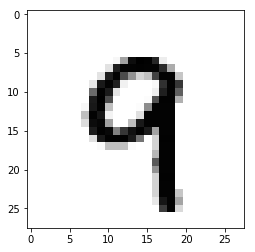

In [9]:
training_epochs = 15
# 전체 training 데이터 set를 한번 학습시킨것을 1 epoch 라고한다
batch_size = 100 # 한번에 가져올 batch 데이터사이즈

sess = tf.Session()
##with tf.Session() as sess:
sess.run(tf.global_variables_initializer())
    
for epoch in range(training_epochs): #몇번을 학습시킬것인가.
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
        
    for i in range(total_batch): # 전체데이터수 / batch_size = 도는횟수
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
        avg_cost += c / total_batch
            
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
## eval이란 함수대신 sess.run()으로 사용가능(하나만사용할때 주로사용)
## 학습할때 전혀쓰지않았던 test데이터로 결과돌려봄
print(mnist.test.labels)
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show() 